In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_dataset.csv')
dataset.head(5)

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,1,52,0,30.239636,149,113,115,0.312886,1
1,2,53,1,30.932781,71,39,104,0.389526,0
2,3,21,0,45.092714,161,67,151,1.205869,0
3,4,39,0,47.795530,101,165,184,0.595201,1
4,5,22,1,20.718108,160,158,116,0.974248,1


# **KNN CLASSIFICATION**

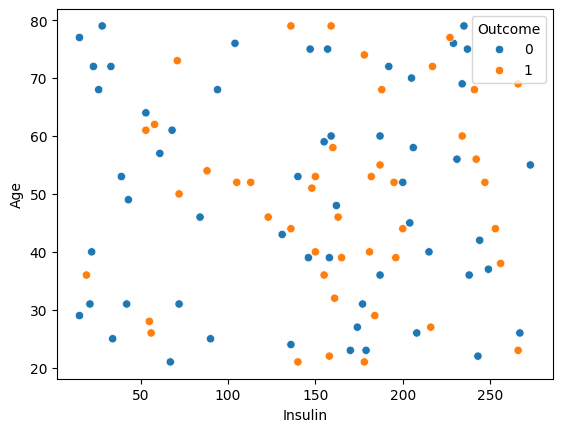

In [4]:
sns.scatterplot(x='Insulin',y='Age',hue='Outcome',data=dataset)
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Outcome"]

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [7]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [8]:
x

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction
0,-1.714816,0.154571,-0.980196,-0.237655,0.785234,-0.508638,-0.515178,-1.299670
1,-1.680173,0.211191,1.020204,-0.163210,-1.670590,-1.515841,-0.818061,-1.179667
2,-1.645531,-1.600635,-0.980196,1.357597,1.163053,-1.134737,0.476078,0.098561
3,-1.610888,-0.581483,-0.980196,1.647885,-0.726042,0.199127,1.384729,-0.857622
4,-1.576245,-1.544015,1.020204,-1.260287,1.131568,0.103851,-0.487643,-0.264111
...,...,...,...,...,...,...,...,...
95,1.576245,-1.204298,1.020204,1.659454,1.257508,-1.298067,-1.203550,-1.052924
96,1.610888,0.381050,1.020204,0.196585,-0.096344,1.247163,-1.644108,0.175077
97,1.645531,0.494289,-0.980196,0.326287,0.879689,0.757172,0.751427,0.368419
98,1.680173,0.607528,1.020204,0.815447,-1.229801,0.117462,-0.102154,-1.438258


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [13]:
knn.score(x_test,y_test)*100

80.0

In [14]:
knn.score(x_train,y_train)*100

52.5

In [15]:
knn.predict(x_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [16]:
knn.predict([[6,73,1,25.08,153,71,79,1.308]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:
for i in range(1,30):
  knn1 = KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  print(i,knn1.score(x_train,y_train)*100), print(i,knn1.score(x_test,y_test)*100)


1 100.0
1 45.0
2 76.25
2 50.0
3 67.5
3 50.0
4 71.25
4 60.0
5 67.5
5 60.0
6 62.5
6 60.0
7 63.74999999999999
7 60.0
8 52.5
8 55.00000000000001
9 57.49999999999999
9 60.0
10 51.24999999999999
10 70.0
11 55.00000000000001
11 75.0
12 55.00000000000001
12 75.0
13 52.5
13 80.0
14 53.75
14 70.0
15 52.5
15 70.0
16 53.75
16 60.0
17 56.25
17 65.0
18 52.5
18 60.0
19 48.75
19 75.0
20 53.75
20 60.0
21 51.24999999999999
21 70.0
22 50.0
22 70.0
23 47.5
23 65.0
24 50.0
24 60.0
25 50.0
25 60.0
26 50.0
26 55.00000000000001
27 48.75
27 50.0
28 50.0
28 50.0
29 47.5
29 40.0


In [18]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


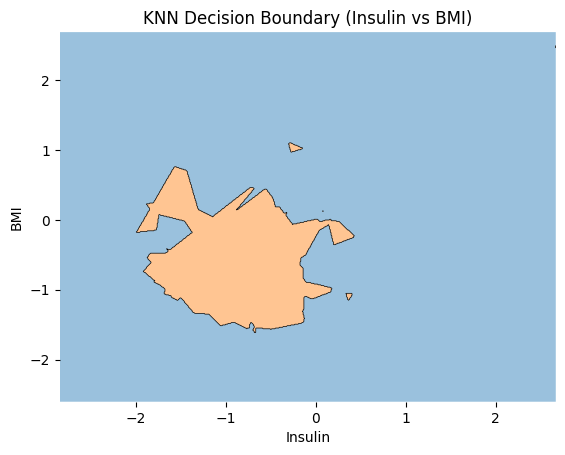

In [19]:
feature_names = x.columns
feature_index = x.columns.get_indexer(['Insulin', 'Age'])

filler_features_names = [col for col in x.columns if col not in ['Insulin', 'Age']]
# Correctly create filler_feature_values with integer indices as keys
filler_feature_values = {x.columns.get_loc(f_name): x[f_name].mean() for f_name in filler_features_names}

plot_decision_regions(X=x.to_numpy(), y=y.to_numpy(), clf=knn,
                      feature_index=feature_index,
                      filler_feature_values=filler_feature_values,
                      legend=2)
plt.xlabel('Insulin')
plt.ylabel('BMI')
plt.title('KNN Decision Boundary (Insulin vs BMI)')
plt.show()

# **KNN Regression**

In [38]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/car data.csv')
dataset.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [39]:
x = dataset.drop(columns="Kms_Driven")
y = dataset["Kms_Driven"]

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knnr = KNeighborsRegressor(n_neighbors=12)
knnr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=12)

In [63]:
knnr.score(x_test,y_test)*100

55.0304461024365

In [64]:
knnr.score(x_train,y_train)*100

26.532515092555297

In [60]:
for i in range(1,30):
  knnr = KNeighborsClassifier(n_neighbors=i)
  knnr.fit(x_train,y_train)
  print(i,knnr.score(x_train,y_train)*100), print(i,knnr.score(x_test,y_test)*100)


1 98.75
1 4.918032786885246
2 48.333333333333336
2 1.639344262295082
3 33.75
3 1.639344262295082
4 27.083333333333332
4 1.639344262295082
5 21.25
5 1.639344262295082
6 16.25
6 1.639344262295082
7 14.166666666666666
7 1.639344262295082
8 13.333333333333334
8 1.639344262295082
9 10.833333333333334
9 1.639344262295082
10 10.416666666666668
10 1.639344262295082
11 10.0
11 1.639344262295082
12 9.583333333333334
12 0.0
13 10.0
13 0.0
14 10.0
14 0.0
15 10.0
15 1.639344262295082
16 8.75
16 1.639344262295082
17 7.916666666666666
17 1.639344262295082
18 7.083333333333333
18 1.639344262295082
19 7.083333333333333
19 1.639344262295082
20 6.25
20 1.639344262295082
21 6.25
21 1.639344262295082
22 6.666666666666667
22 0.0
23 7.916666666666666
23 0.0
24 8.333333333333332
24 0.0
25 8.75
25 0.0
26 7.5
26 0.0
27 7.083333333333333
27 0.0
28 7.5
28 0.0
29 7.5
29 1.639344262295082
